In [23]:
import pandas as pd

df = pd.read_csv("./class_animals.csv")

# Wenn du ein paar Spalten vorab aus den Daten entfernen
# df = df.drop("Spaltenname", axis = 1)

# Wenn du eine kategorische Variable in mehrere Spalten umwandeln
# möchtest, kannst du das mit folgendem Code tun:
df = pd.get_dummies(df, columns = ["Ort", "Season"])


df.head()

,Datum,Zeit,Reh,Ricke,Rehbock,Kitz,Hase,Ricke_und_Kitz,Fuchs,Keiler,...,Ort_Rohr,Ort_Rumpelstielzchen,Ort_Schaefer_Wingert,Ort_Schlamberg,Ort_Steiler_Weg,Ort_Unter_den_Haeusern,Ort_Wegen_zur_Strasse,Ort_Ziegenmann_II,Season_autumn,Season_summer
0,28072017,184000,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,28072017,184000,0.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,28072017,184000,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,28072017,184000,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29072017,191000,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["Season_autumn", "Season_summer"]].values

# Oder: Die Spalte "success" soll nicht zur Vorhersage verwendet werden:
# X = df.drop("success", axis = 1).values

y = df["Reh"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [9]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", n_estimators = 30)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

In [16]:
# Hinweis: Damit dieser Befehl funktioniert, muss die 
# "helper.py" - Datei im selben Ordner liegen, wie das
# aktuelle Jupyter Notebook

from helper import plot_classifier

# Trainings-Daten plotten
plot_classifier(model, X_train, y_train, proba = False, xlabel = "Ricke", ylabel = "Datum/Zeit")

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 432x288 with 0 Axes>

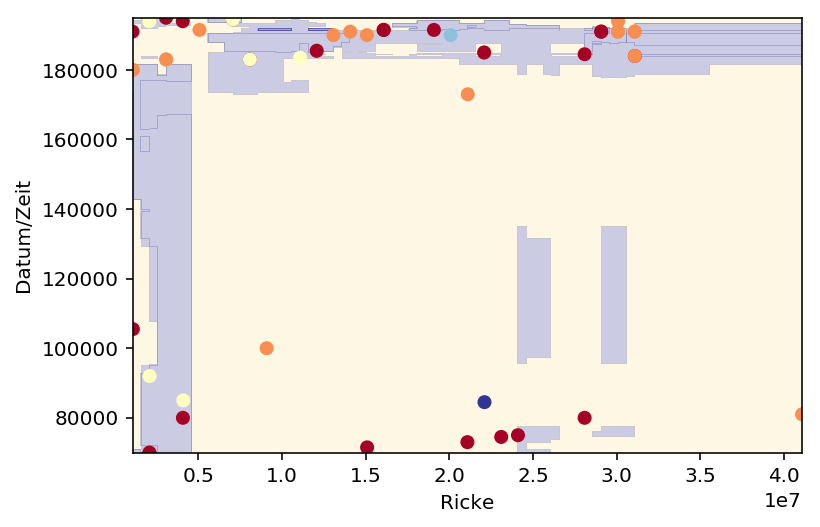

In [13]:
# Testdaten plotten
plot_classifier(model, X_test, y_test, proba = False, xlabel = "Ricke", ylabel = "Datum/Zeit")

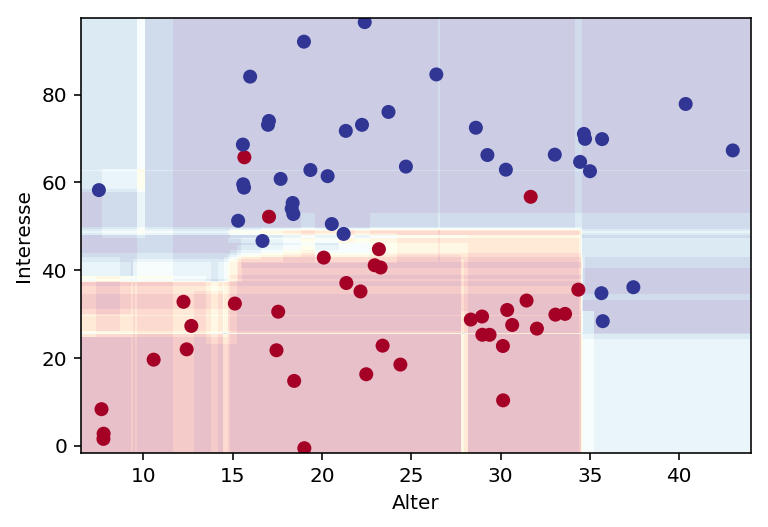

In [13]:
plot_classifier(model, X_test, y_test, proba = True, xlabel = "Alter", ylabel = "Interesse")